In [4]:
# Importing Packages
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append('https')
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\somdd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### EDA

In [5]:
# Load in the train and test data
train = pd.read_csv('sent_train.csv')
test = pd.read_csv('sent_valid.csv')

In [6]:
# Looking at the first five tweets
train.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [7]:
# Checking out one of the tweets
train['text'].iloc[2]

'$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb'

In [8]:
# Checking to see if there are any null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9543 non-null   object
 1   label   9543 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 149.2+ KB


In [9]:
# Checking for class imbalance
train['label'].value_counts(normalize = True)

2    0.647386
1    0.201509
0    0.151106
Name: label, dtype: float64

**There seems to be some class imbalance in the data**

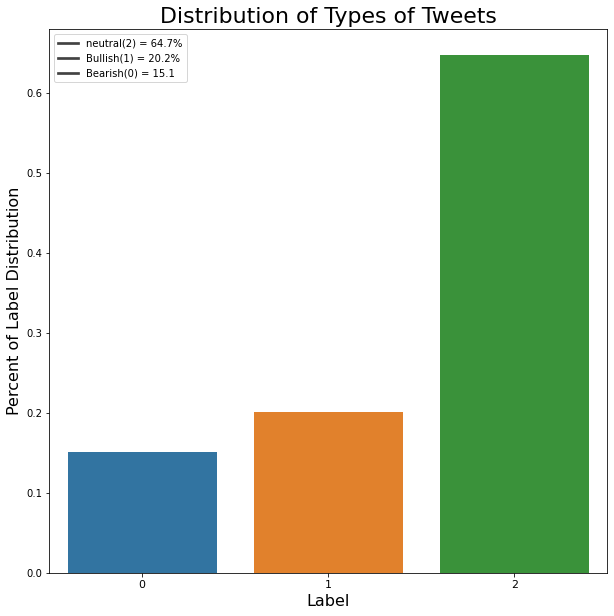

In [14]:
# Visualizing distribution of label imbalance
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (10,10))

x = train['label'].value_counts().index
y = train['label'].value_counts(normalize = True)

sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Distribution of Types of Tweets', fontsize = 22)
ax.set_xlabel('Label', fontsize = 16)
ax.set_ylabel('Percent of Label Distribution', fontsize = 16)

plt.legend(['neutral(2) = 64.7%', 'Bullish(1) = 20.2%', 'Bearish(0) = 15.1'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize = 11);

## Fully Normalized Document

In [109]:
def process_doc(doc):

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
        
    # remove stop words and punctuations, then lower case
    doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok.lower() not in stop_words)) ]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
    doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]
    doc_norm = [token for token in doc_norm if len(token) >  0]
    
    return doc_norm

In [110]:
normalized_corpus = train['text'].apply(process_doc)
normalized_corpus

In [111]:
flattened_fully_norm = pd.Series(list(itertools.chain(*normalized_corpus)))
len(flattened_fully_norm.unique())

11903

In [118]:
normalized_corpus = normalized_corpus.loc[normalized_corpus.map(lambda x: len(x) > 0)]

In [119]:
fnc = normalized_corpus.apply(" ".join)

In [120]:
fnc.to_csv("finance_tweets_train.csv")

In [121]:
fnc

0                     bynd jpmorgan reel expectation meat
1       ccl rcl nomura point booking weakness carnival...
2       cx cemex cut credit suisse morgan weak buildin...
3                            es btig research cut neutral
4                         fnko funko slide jaffray pt cut
                              ...                        
9538    week gainer loser stoxx europe economy markets...
9539    tupperware brand consumer gainer unilever lead...
9540    vtv therapeutic lead healthcare gainer myomo b...
9541                         work xpo pyx amkr hour mover
9542                              yndx qd oesx tech mover
Name: text, Length: 9534, dtype: object